# USING THE NEW YORK TIME API, WE WILL ANALYZE SENTIMENT OF THE LAST TWO MONTHS OF THE YEAR FROM 1992-2019 TO PREDICT SENTIMENT FOR 2020.

In [294]:
import os
import pandas as pd
from dotenv import load_dotenv
from nytimesarticle import articleAPI
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)
from pathlib import Path

import numpy as np
import hvplot.pandas

from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

from sklearn.ensemble import RandomForestRegressor

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

from sklearn.ensemble import GradientBoostingClassifier

%matplotlib inline
load_dotenv()

True

In [53]:
#called api key
nyt_api_key = os.getenv("NYT_API")

api= articleAPI(nyt_api_key)

api

In [54]:
# pulled articles from NYT (90s)
articles_92 = api.search(q="holiday sales",begin_date=19921101, end_date=19921231)
articles_93 = api.search(q="holiday sales",begin_date=19931101, end_date=19931231)
articles_94 = api.search(q="holiday sales",begin_date=19941101, end_date=19941231)
articles_95 = api.search(q="holiday sales",begin_date=19951101, end_date=19951231)
articles_96 = api.search(q="holiday sales",begin_date=19961101, end_date=19961231)
articles_97 = api.search(q="holiday sales",begin_date=19971101, end_date=19971231)
articles_98 = api.search(q="holiday sales",begin_date=19981101, end_date=19981231)
articles_99 = api.search(q="holiday sales",begin_date=19991101, end_date=19991231)

In [55]:
# pulled articles from NYT(00s)
articles_00 = api.search(q="holiday sales",begin_date=20001101, end_date=20001231)
articles_01 = api.search(q="holiday sales",begin_date=20011101, end_date=20011231)
articles_02 = api.search(q="holiday sales",begin_date=20021101, end_date=20021231)
articles_03 = api.search(q="holiday sales",begin_date=20031101, end_date=20031231)
articles_04 = api.search(q="holiday sales",begin_date=20041101, end_date=20041231)
articles_05 = api.search(q="holiday sales",begin_date=20051101, end_date=20051231)
articles_06 = api.search(q="holiday sales",begin_date=20061101, end_date=20061231)
articles_07 = api.search(q="holiday sales",begin_date=20071101, end_date=20071231)
articles_08 = api.search(q="holiday sales",begin_date=20081101, end_date=20081231)
articles_09 = api.search(q="holiday sales",begin_date=20091101, end_date=20091231)


In [56]:
#pulled articles for NYT (00-19)
articles_10 = api.search(q="holiday sales",begin_date=20101101, end_date=20101231)
articles_11 = api.search(q="holiday sales",begin_date=20111101, end_date=20111231)
articles_12 = api.search(q="holiday sales",begin_date=20121101, end_date=20121231)
articles_13 = api.search(q="holiday sales",begin_date=20131101, end_date=20131231)
articles_14 = api.search(q="holiday sales",begin_date=20141101, end_date=20141231)
articles_15 = api.search(q="holiday sales",begin_date=20151101, end_date=20151231)
articles_16 = api.search(q="holiday sales",begin_date=20161101, end_date=20161231)
articles_17 = api.search(q="holiday sales",begin_date=20171101, end_date=20171231)
articles_18 = api.search(q="holiday sales",begin_date=20181101, end_date=20181231)
articles_19 = api.search(q="holiday sales",begin_date=20191101, end_date=20191231)


In [57]:
# Dataframe for 92
articles92= articles_92['response']
articles_df_92 = pd.DataFrame(articles92['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])

articles_df_92.head()

,abstract,headline,keywords,lead_paragraph
pub_date,,,,
1992-12-26T05:00:00+0000,It was a hair-raising holiday season for man...,"{'main': 'A SHARP REBOUND IN CHRISTMAS SALES',...","[{'name': 'subject', 'value': 'Weather', 'rank...",It was a hair-raising holiday season for many ...
1992-12-13T05:00:00+0000,A Blow to the Wallet Retailers and public ...,"{'main': 'MORE ON THE STORM', 'kicker': None, ...","[{'name': 'subject', 'value': 'NO INDEX TERMS'...",A Blow to the Wallet
1992-11-28T05:00:00+0000,Signs of a comeback in consumer spending pus...,{'main': 'Stocks Hit Record Highs On Slow Day'...,"[{'name': 'organizations', 'value': 'New York ...",Signs of a comeback in consumer spending pushe...
1992-12-12T05:00:00+0000,Losses at R. H. Macy & Company narrowed in t...,{'main': 'Macy Reports a Narrower Loss in Quar...,"[{'name': 'organizations', 'value': 'Macy, R H...",Losses at R. H. Macy & Company narrowed in the...
1992-11-19T05:00:00+0000,With their fingers tightly crossed and rabbi...,{'main': 'A Retail Season of Hope and Caution'...,"[{'name': 'glocations', 'value': 'United State...",With their fingers tightly crossed and rabbits...


In [58]:
# Dataframe for 93
articles93= articles_93['response']
articles_df_93 = pd.DataFrame(articles93['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_93.head()

,abstract,headline,keywords,lead_paragraph
pub_date,,,,
1993-12-27T05:00:00+0000,When the nation's retailers locked their doo...,"{'main': 'Late Sales Lift Results For Stores',...","[{'name': 'subject', 'value': 'Sales', 'rank':...",When the nation's retailers locked their doors...
1993-11-05T05:00:00+0000,There was little consistency in the October ...,{'main': 'Sales Data Offer Few Clues To Stores...,"[{'name': 'glocations', 'value': 'United State...",There was little consistency in the October sa...
1993-11-25T05:00:00+0000,"Never mind that holly boughs, tinsel and bli...","{'main': 'This Season, Retail Experts Can't Se...","[{'name': 'glocations', 'value': 'United State...","Never mind that holly boughs, tinsel and blink..."
1993-12-13T05:00:00+0000,Although holiday sales have proved somewhat ...,{'main': 'Gift-Wrap Index Predicts Happy Holid...,"[{'name': 'glocations', 'value': 'United State...",Although holiday sales have proved somewhat di...
1993-11-29T05:00:00+0000,Reviews were upbeat yesterday for the tradit...,"{'main': 'Cheered by Solid Weekend Sales, Merc...","[{'name': 'glocations', 'value': 'United State...",Reviews were upbeat yesterday for the traditio...


In [59]:
# Dataframe for 94
articles94= articles_94['response']
articles_df_94 = pd.DataFrame(articles94['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_94.head()

,abstract,headline,keywords,lead_paragraph
pub_date,,,,
1994-12-18T05:00:00+0000,RETAILERS and economic analysts said last week...,{'main': 'Holiday Sales Reflect Rise In Confid...,"[{'name': 'glocations', 'value': 'Long Island ...",RETAILERS and economic analysts said last week...
1994-12-29T05:00:00+0000,"Shares of Toys ""R"" Us Inc. fell 9 percent ye...",{'main': 'TOYS 'R' US SHARES FALL ON WEAK HOLI...,"[{'name': 'organizations', 'value': 'Toys 'R' ...","Shares of Toys ""R"" Us Inc. fell 9 percent yest..."
1994-11-04T05:00:00+0000,Mother Nature seems determined to keep merch...,{'main': 'Warm Weather Slowed Retail Sales in ...,"[{'name': 'subject', 'value': 'Sales', 'rank':...",Mother Nature seems determined to keep merchan...
1994-12-28T05:00:00+0000,Even as retailers take final markdowns as th...,"{'main': 'Merchants Fear Fewer Sales Ahead', '...","[{'name': 'subject', 'value': 'Sales', 'rank':...",Even as retailers take final markdowns as they...
1994-11-06T05:00:00+0000,HOLIDAY SALES\n\nHoliday sales are already get...,"{'main': 'NEW JERSEY GUIDE', 'kicker': None, '...","[{'name': 'subject', 'value': 'NO INDEX TERMS'...",HOLIDAY SALES


In [60]:
# Dataframe for 95
articles95= articles_95['response']
articles_df_95 = pd.DataFrame(articles95['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_95.head()

,abstract,headline,keywords,lead_paragraph
pub_date,,,,
1995-12-15T05:00:00+0000,"In this season of gift-giving, Macy's has deci...",{'main': 'Macy's Marks Down Some Workers' Holi...,"[{'name': 'organizations', 'value': 'Macy, R H...","In this season of gift-giving, Macy's has deci..."
1995-12-14T05:00:00+0000,"Retail sales rebounded last month, the Governm...",{'main': 'U.S. Reports A Rebound In Retail Sal...,"[{'name': 'glocations', 'value': 'United State...","Retail sales rebounded last month, the Governm..."
1995-12-19T05:00:00+0000,The Standard & Poor's Corporation said today t...,{'main': 'Standard & Poor's Delays A Decision ...,"[{'name': 'organizations', 'value': 'Kmart Cor...",The Standard & Poor's Corporation said today t...
1995-12-12T05:00:00+0000,New orders for computer chips declined in Nove...,{'main': 'Orders for Computer Chips Fall Along...,"[{'name': 'organizations', 'value': 'Semicondu...",New orders for computer chips declined in Nove...
1995-11-25T05:00:00+0000,"Tom Luzod was determined to find the bargains,...","{'main': 'Stores Full, But Shoppers Seem Wary'...","[{'name': 'subject', 'value': 'RETAIL STORES A...","Tom Luzod was determined to find the bargains,..."


In [61]:
# Dataframe for 96
articles96= articles_96['response']
articles_df_96 = pd.DataFrame(articles96['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_96.head()

,abstract,headline,keywords,lead_paragraph
pub_date,,,,
1996-12-18T05:00:00+0000,"Retailers, as final week of holiday selling se...","{'main': 'For Retailers, Weather Is Wild Card ...","[{'name': 'subject', 'value': 'Sales', 'rank':...",As the final week of the holiday selling seaso...
1996-11-07T05:00:00+0000,Intel Corp says it expects its fourth-quarter ...,{'main': 'INTEL PREDICTS STRONG QUARTERLY SALE...,"[{'name': 'organizations', 'value': 'Intel Cor...",The Intel Corporation said yesterday that it e...
1996-12-28T05:00:00+0000,Nordstrom Inc says it will report lower-than-e...,{'main': 'NORDSTROM LOWERS FOURTH-QUARTER ESTI...,"[{'name': 'organizations', 'value': 'Nordstrom...",Nordstrom Inc. said it would report lower-than...
1996-12-08T05:00:00+0000,New Jersey retailers hope that brisk start to ...,{'main': 'Retailers and Diehard Shoppers Plung...,"[{'name': 'glocations', 'value': 'New Jersey',...",In a corner of the vast Kids World here the mo...
1996-11-17T05:00:00+0000,Bargain holiday shopping in New York noted,"{'main': 'Holiday Bargains With a Twist', 'kic...","[{'name': 'glocations', 'value': 'New York Cit...",Though retail stores are beginning early holid...


In [62]:
# Dataframe for 97
articles97= articles_97['response']
articles_df_97 = pd.DataFrame(articles97['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_97.head()

,abstract,headline,keywords,lead_paragraph
pub_date,,,,
1997-12-27T05:00:00+0000,Treasury prices ended slightly higher yesterda...,"{'main': 'Treasury Prices Move Higher, Helped ...",[],Treasury prices ended slightly higher yesterda...
1997-12-26T05:00:00+0000,Retailers Finding Sales Disappoint For The Hol...,{'main': 'RETAILERS FINDING SALES DISAPPOINT F...,"[{'name': 'subject', 'value': 'Sales', 'rank':...","A sparkling economy, record-low unemployment a..."
1997-12-28T05:00:00+0000,It's become as much a part of the seasonal rit...,"{'main': 'December 21-27; Now, Only 362 Shoppi...",[],It's become as much a part of the seasonal rit...
1997-12-01T05:00:00+0000,Retail sales were light over Thanksgiving Day ...,"{'main': 'Holiday Shoppers Start Selectively, ...","[{'name': 'subject', 'value': 'Thanksgiving Da...",If ever a Thanksgiving weekend underscored the...
1997-12-10T05:00:00+0000,National Association of Purchasing Management'...,{'main': 'Survey Shows Manufacturers Optimisti...,"[{'name': 'glocations', 'value': 'Far East, So...",United States manufacturers are optimistic abo...


In [226]:
# Dataframe for 98
articles98= articles_98['response']
articles_df_98 = pd.DataFrame(articles98['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_98.head()

,abstract,headline,keywords,lead_paragraph
pub_date,,,,
1998-12-04T05:00:00+0000,Specialty stores and discounters outdistance m...,{'main': 'Discounters Report Strong Holiday Sa...,"[{'name': 'subject', 'value': 'Discount Sellin...",Specialty stores and discounters outdistanced ...
1998-11-06T05:00:00+0000,Bank of Tokyo-Mitsubishi Ltd says retailers ac...,{'main': 'Retailers Say October Sales Were Bet...,"[{'name': 'organizations', 'value': 'Bank of T...",Retailers across the nation reported a better-...
1998-12-29T05:00:00+0000,Holiday sales figures for Internet retailers s...,{'main': 'Estimates for On-Line Shopping Excee...,"[{'name': 'organizations', 'value': 'Boston Co...",Holiday sales figures for Internet retailers r...
1998-11-30T05:00:00+0000,Department store executives express cautious o...,"{'main': 'Holiday Shopping Off to Good Start',...","[{'name': 'subject', 'value': 'Thanksgiving Da...",While unexpectedly warm weather brought hordes...
1998-12-09T05:00:00+0000,National Association of Purchasing Management ...,"{'main': 'Manufacturers Are Less Upbeat', 'kic...","[{'name': 'organizations', 'value': 'NATIONAL ...",United States manufacturers are less optimisti...


In [227]:
# Dataframe for 99
articles99= articles_99['response']
articles_df_99 = pd.DataFrame(articles99['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_99.head()

,abstract,headline,keywords,lead_paragraph
pub_date,,,,
1999-12-29T05:00:00+0000,Holiday retail purchases made in New York City...,{'main': 'Holiday Sales Paid by Check Increase...,"[{'name': 'glocations', 'value': 'New York Cit...",In a measure of particularly strong holiday sh...
1999-11-16T05:00:00+0000,Commerce Department reports inventories rose f...,{'main': 'A 0.4% Jump In Inventories For Septe...,"[{'name': 'organizations', 'value': 'Commerce ...",The nation's businesses stockpiled goods in Se...
1999-12-03T05:00:00+0000,Unseasonably warm weather put damper on retail...,{'main': 'November a 'Funny Month' For the Nat...,"[{'name': 'subject', 'value': 'RETAIL STORES A...",Unseasonably warm weather put a damper on reta...
1999-12-01T05:00:00+0000,"Consumer optimism rebounded in November, bolst...",{'main': 'Monthly Index Registers Burst of Hop...,[],"Consumer optimism rebounded in November, bolst..."
1999-12-24T05:00:00+0000,Online holiday shopping is gnawing at business...,{'main': 'Retailers Look Back and See Online S...,"[{'name': 'organizations', 'value': 'VISA INTE...",Online holiday shopping is increasingly gnawin...


In [228]:
# Dataframe for 00
articles00= articles_00['response']
articles_df_00 = pd.DataFrame(articles00['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_00.head()

,abstract,headline,keywords,lead_paragraph
pub_date,,,,
2000-12-27T05:00:00+0000,Industry analysts say holiday shopping season ...,"{'main': 'Sales in Holiday Season Rose, Just B...","[{'name': 'organizations', 'value': 'Internati...",Despite widespread markdowns and a burst of la...
2000-11-30T05:00:00+0000,"Gateway, second-largest US direct seller of co...",{'main': 'Sales of PC's Down Sharply At Gatewa...,"[{'name': 'organizations', 'value': 'Gateway I...","Gateway, the nation's second-largest direct se..."
2000-12-26T05:00:00+0000,EToys and other Internet retailers are cutting...,{'main': 'Internet Retailers Switch To Clearin...,"[{'name': 'organizations', 'value': 'eToys Inc...",EToys and other Internet retailers are cutting...
2000-12-18T05:00:00+0000,"Last-minute sales, ingrained holiday tradition...",{'main': 'Early Bargains Aren't Enticing Many ...,"[{'name': 'subject', 'value': 'United States E...","This year, Sears is throwing its after-Christm..."
2000-12-23T05:00:00+0000,Online retail sales are estimated to rise of b...,{'main': 'Last Noel for Some Dot-Coms; Traditi...,"[{'name': 'subject', 'value': 'Sales', 'rank':...","For Internet merchants, this holiday season is..."


In [229]:
# Dataframe for 01
articles01= articles_01['response']
articles_df_01 = pd.DataFrame(articles01['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_01.head()

,abstract,headline,keywords,lead_paragraph
pub_date,,,,
2001-11-19T05:00:00+0000,Article discusses bleak holiday sales outlook ...,{'main': 'Holiday Sales Outlook Roils Book Bus...,"[{'name': 'glocations', 'value': 'New York Cit...",When the profitable life of a new hardcover bo...
2001-12-04T05:00:00+0000,BizRate.com reports 29 percent rise in Interne...,{'main': 'Technology Briefing | Internet: Onli...,"[{'name': 'organizations', 'value': 'Bizrate.c...",Internet sales rose 29 percent in the first tw...
2001-12-27T05:00:00+0000,Last-minute shopping surge may have given nati...,{'main': 'Late Shopping Gives Retailers A Slig...,"[{'name': 'organizations', 'value': 'Wal-Mart ...",A surge of last-minute shopping may have given...
2001-12-23T05:00:00+0000,Fears about anthrax spreading by mail have not...,"{'main': 'Greetings Without Fear', 'kicker': '...","[{'name': 'organizations', 'value': 'Hallmark ...",Fears about anthrax in the mail apparently hav...
2001-12-27T05:00:00+0000,Late Surge in Holiday Sales May Have Lifted R...,"{'main': 'BUSINESS DIGEST', 'kicker': None, 'c...",[],Late Surge in Holiday Sales May Have Lifted Re...


In [230]:
# Dataframe for 02
articles02= articles_02['response']
articles_df_02 = pd.DataFrame(articles02['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_02.head()

,abstract,headline,keywords,lead_paragraph
pub_date,,,,
2002-12-19T05:00:00+0000,Roundup of Manhattan stores featuring bargain ...,"{'main': 'Let the After-Holiday Sales Begin', ...","[{'name': 'glocations', 'value': 'New York Cit...",THERE was a time when ''January'' and ''sales'...
2002-12-25T05:00:00+0000,Retailers' hoped-for last minute shopping rush...,{'main': 'Holiday Sales May Climb An Anemic 1%...,"[{'name': 'organizations', 'value': 'Internati...","Fabian Mira, a 32-year-old father of two daugh..."
2002-12-27T05:00:00+0000,This year's holiday season is worst in many ye...,{'main': 'GROWTH IN SALES FOR HOLIDAY PERIOD I...,"[{'name': 'glocations', 'value': 'Iraq', 'rank...",After examining sales figures from the last fr...
2002-12-24T05:00:00+0000,Wal-Mart Stores says that December sales are n...,{'main': 'WAL-MART SAYS DECEMBER SALES ON LOW ...,"[{'name': 'organizations', 'value': 'Wal-Mart ...",Wal-Mart Stores said yesterday that December s...
2002-12-23T05:00:00+0000,Early holiday reports indicate that sales of C...,"{'main': 'Despite a Marketing Blitz, CD Sales ...","[{'name': 'subject', 'value': 'Sales', 'rank':...",Despite efforts by record executives to stanch...


In [231]:
# Dataframe for 03
articles03= articles_03['response']
articles_df_03 = pd.DataFrame(articles03['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_03.head()

,abstract,headline,keywords,lead_paragraph
pub_date,,,,
2003-12-02T05:00:00+0000,"Poring over the weekend sales figures, retail ...",{'main': 'Retail Analysts Yawn at Early Holida...,[],"Poring over the weekend sales figures, retail ..."
2003-11-29T05:00:00+0000,"Holiday sales on Black Friday, day after Thank...","{'main': 'They're Off and Shopping, but Seekin...","[{'name': 'organizations', 'value': 'National ...","Holiday shoppers, intent on bargains, descende..."
2003-12-27T05:00:00+0000,Estimates of Christmas holiday sales gain this...,{'main': 'Sales Results for the Holiday Trickl...,"[{'name': 'organizations', 'value': 'Wal-Mart ...",As sales results began to trickle in yesterday...
2003-12-01T05:00:00+0000,Estimates of post-Thanksgiving retail sales ra...,{'main': 'Early Sales Appear Modest As Holiday...,"[{'name': 'subject', 'value': 'Sales', 'rank':...",Estimates of post-Thanksgiving retail sales ra...
2003-12-02T05:00:00+0000,"OfficeMax, the office products retailer, said ...",{'main': 'OfficeMax Raises Forecast for the Qu...,[],"OfficeMax, the office products retailer, said ..."


In [232]:
# Dataframe for 04
articles04= articles_04['response']
articles_df_04 = pd.DataFrame(articles04['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_04.head()

,abstract,headline,keywords,lead_paragraph
pub_date,,,,
2004-12-29T05:00:00+0000,Baseball has long fashioned itself a typical A...,{'main': 'Baseball's Holiday Sales: Few Shoppe...,"[{'name': 'subject', 'value': 'Baseball', 'ran...",Baseball has long fashioned itself a typical A...
2004-11-27T05:00:00+0000,Millions of Americans start their holiday shop...,"{'main': 'In Annual Rite, Shoppers Mob Holiday...","[{'name': 'organizations', 'value': 'National ...",Surrounded by hundreds of shoppers grabbing ba...
2004-12-27T05:00:00+0000,Online sales growth surpasses high range of es...,"{'main': 'A Good Season for Online Sales', 'ki...","[{'name': 'organizations', 'value': 'National ...",ONLINE sales surpassed the high range of estim...
2004-12-27T05:00:00+0000,video game industry is poised to enjoy record-...,{'main': 'Game Sales Thrive Thanks to the Big ...,"[{'name': 'organizations', 'value': 'NPD GROUP...",The video game industry is poised to enjoy a r...
2004-12-05T05:00:00+0000,Tracie Rozhon article on frantic Christmas sho...,"{'main': 'The Dry Goods Frenzy, Updated', 'kic...","[{'name': 'subject', 'value': 'Sales', 'rank':...",AS the angry lady with the stroller grabbed th...


In [233]:
# Dataframe for 05
articles05= articles_05['response']
articles_df_05 = pd.DataFrame(articles05['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_05.head()

,abstract,headline,keywords,lead_paragraph
pub_date,,,,
2005-11-26T05:00:00+0000,"At 12:05 a.m. yesterday, moments into the earl...",{'main': 'Dawn Rush Hints at Strong Start to H...,"[{'name': 'subject', 'value': 'Discount Sellin...","At 12:05 a.m. yesterday, moments into the earl..."
2005-12-08T05:00:00+0000,"Texas Instruments, one of the biggest makers o...",{'main': 'Strong Sales Bolster Profit at Chip ...,"[{'name': 'organizations', 'value': 'TEXAS INS...","Texas Instruments, one of the biggest makers o..."
2005-12-30T05:00:00+0000,"Online retailers, whose growth was expected to...",{'main': 'Internet Sales Show Big Gains Over H...,"[{'name': 'subject', 'value': 'Holidays and Sp...","Online retailers, whose growth was expected to..."
2005-11-25T05:00:00+0000,,{'main': 'Stocks: Wall Streets caps a 5th week...,[],
2005-11-15T05:00:00+0000,Wal-Mart Stores reports 3.8 percent rise in th...,"{'main': 'Wal-Mart Forecasts Big Season', 'kic...","[{'name': 'organizations', 'value': 'Wal-Mart ...",Wal-Mart Stores sent an early Christmas card t...


In [234]:
# Dataframe for 06
articles06= articles_06['response']
articles_df_06 = pd.DataFrame(articles06['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_06.head()

,abstract,headline,keywords,lead_paragraph
pub_date,,,,
2006-12-01T05:00:00+0000,As the nation's merchants began crunching numb...,{'main': 'Early Holiday Sales Are Strong at De...,"[{'name': 'subject', 'value': 'Sales', 'rank':...",As the nation's merchants began crunching numb...
2006-12-01T05:00:00+0000,Consumers flocked to department stores but lar...,{'main': 'Early Holiday Sales Are Strong at De...,"[{'name': 'subject', 'value': 'Christmas', 'ra...",As the nation’s merchants began crunching numb...
2006-11-26T05:00:00+0000,"Early openings, deep discounts and resurgent d...",{'main': 'Mall Stores See Strong Rise in Holid...,"[{'name': 'subject', 'value': 'RETAIL STORES A...",The clock struck midnight. Then the mall struc...
2006-12-26T05:00:00+0000,Shoppers swarmed discount stores and mobbed su...,"{'main': 'Rush at End, but Holiday Sales Fall ...","[{'name': 'organizations', 'value': 'VISA USA'...",There is always next year.
2006-12-26T05:00:00+0000,The final burst of buying over the crucial hol...,"{'main': 'Rush at End, but Holiday Sales Fall ...","[{'name': 'subject', 'value': 'RETAIL STORES A...",There is always next year.


In [235]:
# Dataframe for 07
articles07= articles_07['response']
articles_df_07 = pd.DataFrame(articles07['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_07.head()

,abstract,headline,keywords,lead_paragraph
pub_date,,,,
2007-11-25T05:00:00+0000,The reports suggest that jittery consumers are...,"{'main': 'Holiday Sales Climb, but Shoppers Sp...","[{'name': 'subject', 'value': 'RETAIL STORES A...",Black Friday was big — but with a big caveat.
2007-11-09T23:52:26+0000,Consumer sentiment warns of low holiday sales.,"{'main': 'Consumer Fear', 'kicker': 'Economix'...",[],Do you think this will be a good year for holi...
2007-11-04T04:00:00+0000,Hunting for holiday bargain fares to Europe? A...,{'main': 'Sales Bring Business Class Within Re...,"[{'name': 'subject', 'value': 'Travel and Vaca...",HUNTING for holiday bargain fares to Europe? T...
2007-11-26T05:00:00+0000,The reports suggest that jittery consumers are...,"{'main': 'Retail Sales Rise, but Stores Relied...","[{'name': 'subject', 'value': 'RETAIL STORES A...",Black Friday was big — but with a big caveat.
2007-11-26T05:00:00+0000,With stores in the United States dangling stee...,{'main': 'Seasonal retail sales in U.S. surge ...,[],With stores in the United States dangling stee...


In [236]:
# Dataframe for 08
articles08= articles_08['response']
articles_df_08 = pd.DataFrame(articles08['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_08.head()

,abstract,headline,keywords,lead_paragraph
pub_date,,,,
2008-11-30T05:00:00+0000,"COLUMBIA, Maryland — The U.S. holiday shopping...",{'main': 'Data point to weak U.S. holiday sale...,[],"COLUMBIA, Maryland — The U.S. holiday shopping..."
2008-12-03T20:25:16+0000,Kanye West’s new “808s & Heartbreak” topped th...,{'main': 'Holiday Sales Down as Kanye West Top...,[],The week of Thanksgiving is usually one of the...
2008-12-18T18:07:22+0000,A look at the top-selling cameras from the onl...,{'main': 'Point-and-Shoots Top Amazon Holiday ...,[],A few weeks ago I spoke with half a dozen came...
2008-11-30T05:00:00+0000,"COLUMBIA, Maryland — The U.S. holiday shopping...",{'main': 'Data point to weak Black Friday sale...,[],"COLUMBIA, Maryland — The U.S. holiday shopping..."
2008-11-26T05:00:00+0000,Retailers began their after-Christmas sales in...,{'main': 'U.S. retail sales fall as analysts s...,[],Retailers began their after-Christmas sales in...


In [237]:
# Dataframe for 09
articles09= articles_09['response']
articles_df_09 = pd.DataFrame(articles09['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_09.head()

,abstract,headline,keywords,lead_paragraph
pub_date,,,,
2009-11-25T17:12:59+0000,"John Mayer’s latest album, “Battle Studies,” e...",{'main': 'John Mayer Is No. 1 in Pre-Holiday S...,[],"John Mayer‘s latest album, “Battle Studies” (..."
2009-11-19T16:30:22+0000,"Online discount retailer, Gilt Groupe Inc. has...","{'main': 'Travel Deals: Luxury for Less', 'kic...",[],Heads up luxury bargain hunters: the online di...
2009-11-26T23:47:15+0000,Holiday sales of hardcovers are the latest cha...,{'main': 'Cheaper Books Come at a High Cost to...,"[{'name': 'organizations', 'value': 'Wal-Mart ...",Kathleen Caldwell is ready for the day after T...
2009-12-11T13:48:09+0000,The figures reinforced expectations of a modes...,{'main': 'Retail Data Shows Strong Start to Ho...,"[{'name': 'subject', 'value': 'United States E...",A strong start to the holiday shopping season ...
2009-12-02T05:01:35+0000,Despite reports of weaker spending on the Frid...,"{'main': 'A November With Rosier Retail Data',...","[{'name': 'subject', 'value': 'Black Friday (S...",Despite reports of weaker spending on the Frid...


In [238]:
# Dataframe for 10
articles10= articles_10['response']
articles_df_10 = pd.DataFrame(articles10['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_10.head()

,abstract,headline,keywords,lead_paragraph
pub_date,,,,
2010-11-29T00:09:03+0000,The average amount spent per person from Thurs...,"{'main': 'Robust Sales for Holiday Weekend', '...","[{'name': 'subject', 'value': 'Black Friday (S...",More Americans went shopping over the Thanksgi...
2010-11-20T01:49:22+0000,The Friday before Thanksgiving offers a refuge...,"{'main': 'Like Black Friday, but Without the F...","[{'name': 'subject', 'value': 'Shopping and Re...","Black Friday, which in the retail industry ref..."
2010-11-24T08:34:13+0000,Student Opinion | Will you take part in the ri...,{'main': 'Do You Plan to Shop on Black Friday?...,[],The day after Thanksgiving is called Black Fri...
2010-11-23T15:46:01+0000,J. Crew will sell itself for $43.50 a share to...,{'main': 'It’s Official: J. Crew to Sell Itsel...,[],"Millard S. Drexler, J. Crew’s chairman and chi..."
2010-12-08T02:37:39+0000,The digital camera maker is advertising a 3-D ...,{'main': 'Fujifilm Ads for a 3-D Camera Aim at...,"[{'name': 'subject', 'value': 'Movies', 'rank'...","WITH the holiday buying season under way, the ..."


In [239]:
# Dataframe for 11
articles11= articles_11['response']
articles_df_11 = pd.DataFrame(articles11['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_11.head()

,abstract,headline,keywords,lead_paragraph
pub_date,,,,
2011-12-16T03:14:38+0000,The Saturday before Christmas is too crucial t...,"{'main': 'As Sales Lag, Stores Shuffle the Cal...","[{'name': 'subject', 'value': 'Consumer Behavi...",When is the final Saturday before Christmas? D...
2011-11-28T02:11:45+0000,American consumers opened their wallets in a w...,"{'main': 'For a Weekend, at Least, Retailers S...","[{'name': 'organizations', 'value': 'National ...",Spurred by aggressive promotions from retailer...
2011-12-29T23:59:22+0000,New York City’s department store restaurants a...,"{'main': 'Lingerie on 6; Lobster on 9', 'kicke...","[{'name': 'organizations', 'value': 'Saks Fift...",MAYBE it was that scene between Kris Kringle a...
2011-12-22T11:33:37+0000,Despite the tough economy and struggles for of...,{'main': 'How People Shopped Online This Holid...,"[{'name': 'subject', 'value': 'Christmas', 'ra...",Little time remains for online shoppers to hav...
2011-12-21T17:55:36+0000,Michael Bublé’s “Christmas” is this year’s hol...,{'main': '‘Christmas’ Makes Michael Bublé’s Ye...,"[{'name': 'subject', 'value': 'Music', 'rank':...",Coming soon as stuffing to a million or two st...


In [240]:
# Dataframe for 12
articles12= articles_12['response']
articles_df_12 = pd.DataFrame(articles12['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_12.head()

,abstract,headline,keywords,lead_paragraph
pub_date,,,,
2012-12-23T21:55:07+0000,Weak PC sales this holiday season suggest the ...,{'main': 'No Sales Pop for a New Version of Wi...,"[{'name': 'subject', 'value': 'Shopping and Re...","BELLEVUE, Wash. — It used to be that a new ver..."
2012-12-14T15:35:18+0000,The beleaguered electronics retailer says it w...,{'main': 'Best Buy Gives Founder More Time to ...,"[{'name': 'subject', 'value': 'Mergers, Acquis...",4:20 p.m. | Updated
2012-12-28T14:04:58+0000,The British publishing and education company P...,"{'main': 'Pearson to Take Stake in Nook Unit',...","[{'name': 'subject', 'value': 'Barnes & Noble ...",8:35 p.m. | Updated
2012-11-01T14:29:14+0000,Retailers enjoyed an average 2.7 percent incre...,"{'main': 'Month of Gains for Stores, Before a ...","[{'name': 'subject', 'value': 'Shopping and Re...",Shoppers continued to spend steadily at retail...
2012-12-17T23:10:16+0000,Even without best sellers on the scale of last...,"{'main': 'No Big Hits, but Bookshops Say They’...","[{'name': 'subject', 'value': 'E-Books and Rea...","Last year, there was a clear winner among book..."


In [241]:
# Dataframe for 13
articles13= articles_13['response']
articles_df_13 = pd.DataFrame(articles13['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_13.head()

,abstract,headline,keywords,lead_paragraph
pub_date,,,,
2013-12-16T02:54:01+0000,"Competition from e-books has eased, but mercha...",{'main': 'Booksellers Wary About Holiday Sales...,"[{'name': 'subject', 'value': 'Shopping and Re...","All across the country, booksellers have a Chr..."
2013-11-22T05:11:17+0000,A budget-conscious consumer mind-set is expect...,"{'main': 'As Holidays Approach, Retailers Figh...","[{'name': 'subject', 'value': 'Company Reports...",Major retailers are bracing for a tough holida...
2013-11-27T16:00:08+0000,Physical and online retailers are in a sort of...,{'main': 'Online and Offline Stores Duke It Ou...,"[{'name': 'subject', 'value': 'Black Friday an...","For many Americans, after the Thanksgiving pla..."
2013-12-01T01:08:01+0000,More large retailers were open on Thanksgiving...,{'main': 'Thanksgiving Openings Take Sales Fro...,"[{'name': 'subject', 'value': 'E-Commerce', 'r...",Shoppers who braved the sales on Black Friday ...
2013-12-20T02:06:41+0000,Target's security breach came at the worst pos...,"{'main': 'Target's holiday hijacked by hack', ...",[],Target's security breach came at the worst pos...


In [242]:
# Dataframe for 14
articles14= articles_14['response']
articles_df_14 = pd.DataFrame(articles14['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_14.head()

,abstract,headline,keywords,lead_paragraph
pub_date,,,,
2014-11-26T17:20:41+0000,Holiday spending is always closely watched — t...,{'main': 'Don’t Believe the Hype: Holiday Sale...,"[{'name': 'persons', 'value': 'Irwin, Neil', '...",If there’s one thing that the news media acros...
2014-12-31T21:58:25+0000,With a new year comes plenty of sales.,"{'main': 'End-of-Season Sales', 'kicker': 'Sco...","[{'name': 'subject', 'value': 'Fashion and App...","­The holidays are drawing to a close, but post..."
2014-11-24T02:59:06+0000,The struggling chain recruited 100 prominent a...,{'main': 'Authors Sign Up to Raise Barnes & No...,"[{'name': 'organizations', 'value': 'Barnes & ...","In an effort to increase holiday sales, which ..."
2014-11-25T23:53:08+0000,"On the edge of the Thanksgiving holiday sales,...","{'main': 'Handicapping the holidays', 'kicker'...",[],"On the edge of the Thanksgiving holiday sales,..."
2014-12-26T21:11:50+0000,Early data from MasterCard SpendingPulse shows...,"{'main': 'Retailers had a happy holiday', 'kic...",[],Early data from MasterCard SpendingPulse shows...


In [243]:
# Dataframe for 15
articles15= articles_15['response']
articles_df_15 = pd.DataFrame(articles15['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_15.head()

,abstract,headline,keywords,lead_paragraph
pub_date,,,,
2015-11-23T22:13:38+0000,Retailers are getting an early jump on holiday...,{'main': 'Retailers set the clocks back on sal...,[],Retailers are getting an early jump on holiday...
2015-11-09T20:37:24+0000,The retailer will open at 6 p.m. on Thanksgivi...,{'main': 'Target Keeps Thanksgiving Opening at...,"[{'name': 'subject', 'value': 'Black Friday an...",Target doesn’t want Americans to miss Thanksgi...
2015-11-30T01:53:45+0000,Black Friday’s importance has waned as retaile...,"{'main': 'Black Friday Just a Day This Year, N...","[{'name': 'subject', 'value': 'Black Friday an...",If the lines at Target or Macy’s this Black Fr...
2015-11-02T22:03:40+0000,"Amazon jumped the gun, opening its holiday sa...",{'main': 'Every day is Black Friday now at Am...,[],"Amazon jumped the gun, opening its holiday sa..."
2015-11-02T21:53:48+0000,"Amazon jumped the gun, opening its holiday sa...",{'main': 'Every day is Black Friday now at Am...,[],"Amazon jumped the gun, opening its holiday sa..."


In [244]:
# Dataframe for 16
articles16= articles_16['response']
articles_df_16 = pd.DataFrame(articles16['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_16.head()

,abstract,headline,keywords,lead_paragraph
pub_date,,,,
2016-12-16T11:00:02+0000,Some part of me still has a child’s desire to ...,"{'main': 'Wishing Away the Wish List', 'kicker...","[{'name': 'subject', 'value': 'Gifts', 'rank':...",I’ve buried my phone at the bottom of my purse...
2016-12-27T19:20:09+0000,The day after Christmas is one of the busiest ...,"{'main': 'After 15 Big Mall Fights, Police See...","[{'name': 'subject', 'value': 'Shopping Center...",Officer Tamara Valle of the Fort Worth Police ...


In [245]:
# Dataframe for 17
articles17= articles_17['response']
articles_df_17 = pd.DataFrame(articles17['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_17.head()

,abstract,headline,keywords,lead_paragraph
pub_date,,,,
2017-11-22T21:21:26+0000,"Except for Amazon, most major retailers have s...",{'main': 'Retailers’ Recipe for the Holidays: ...,"[{'name': 'subject', 'value': 'Shopping and Re...",After 14 years of staying home to raise her fa...
2017-11-30T05:11:39+0000,"Brands, struggling to profit in the critical h...","{'main': 'It’s Dec. 1, So Start Opening Your A...","[{'name': 'subject', 'value': 'Cosmetics and T...","To woo holiday shoppers, many beauty brands ar..."
2017-11-25T01:30:13+0000,An iconic American company is closing stores a...,{'main': 'Scenes From Sears: 2 Locations Tell ...,"[{'name': 'organizations', 'value': 'Sears Hol...","PHILLIPSBURG, N.J. — Every year on Black Frida..."
2017-11-23T19:04:05+0000,"Once the forks are put down for good, American...",{'main': 'Black Friday 2017: Your Best Bargain...,"[{'name': 'subject', 'value': 'Shopping and Re...",As the holiday shopping seasons begins in earn...
2017-12-24T15:21:35+0000,A faded industrial town in the North Country r...,{'main': 'Town Fights to Turn Retail Tide at a...,"[{'name': 'subject', 'value': 'Shopping Center...","MASSENA, N.Y. — When the Payless ShoeSource at..."


In [246]:
# Dataframe for 18
articles18= articles_18['response']
articles_df_18 = pd.DataFrame(articles18['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_18.head()

,abstract,headline,keywords,lead_paragraph
pub_date,,,,
2018-12-23T22:07:10+0000,"A backlog at the printing presses, plus a surg...",{'main': 'Bottleneck at Printers Has Derailed ...,"[{'name': 'subject', 'value': 'Books and Liter...","This year has been, much to everyone’s surpris..."
2018-12-21T14:00:04+0000,So many people give expensive cars as presents...,"{'main': 'When Santa Brings a Car, They’ll Nee...","[{'name': 'subject', 'value': 'Automobiles', '...","Every December, the holiday classics return to..."
2018-11-13T21:27:24+0000,Black Friday and Cyber Monday mean hundreds of...,{'main': 'How to Tell if Those Black Friday De...,"[{'name': 'subject', 'value': 'Shopping and Re...",It’s easy to get caught up in Black Friday sho...
2018-11-22T10:00:13+0000,Consumer confidence points to open pocketbooks...,{'main': 'Holiday Spending Should Be Strong. A...,"[{'name': 'subject', 'value': 'United States E...",Americans are upbeat about the economy heading...
2018-11-21T11:31:55+0000,"In 2018, hefty fiscal stimulus has buoyed the ...",{'main': 'DealBook Briefing: The Stock Rout Is...,"[{'name': 'subject', 'value': 'Stocks and Bond...",Good Wednesday. The briefing will be taking a ...


In [247]:
# Dataframe for 19
articles19= articles_19['response']
articles_df_19 = pd.DataFrame(articles19['docs']).set_index('pub_date').drop(columns = ['_id','byline', 'document_type','multimedia','news_desk'
                                                                         ,'print_page','print_section','snippet','source','subsection_name'
                                                                         ,'type_of_material', 'uri','web_url','word_count','section_name'])
articles_df_19.head()

,abstract,headline,keywords,lead_paragraph
pub_date,,,,
2019-12-26T14:39:23+0000,A retail survey showed an 18.8 percent rise in...,{'main': 'Americans Keep Spending: Holiday Sal...,"[{'name': 'subject', 'value': 'E-Commerce', 'r...","Americans keep spending, driving the economy a..."
2019-11-05T18:55:47+0000,A liquidation sale at Barneys means … 5 percen...,{'main': 'Barneys New York Closing Sales Have ...,"[{'name': 'subject', 'value': 'Shopping and Re...",Days after Barneys New York was sold for piece...
2019-12-20T14:00:08+0000,Holiday sales can present a prime opportunity ...,{'main': 'Santa Didn’t Bring a Car? December I...,"[{'name': 'subject', 'value': 'Automobiles', '...","In one advertisement, a young woman drives hom..."
2019-11-27T10:00:08+0000,It’s not a day. It’s a synonym for “sale.” And...,{'main': 'What Does ‘Black Friday’ Even Mean A...,"[{'name': 'subject', 'value': 'Black Friday an...",“Black Friday Sale Starts Now!” “Shop Black Fr...
2019-12-27T14:00:04+0000,The company gets that many daily submissions t...,{'main': 'The Week in Tech: What 5 Billion Mea...,"[{'name': 'subject', 'value': 'Shopping and Re...","Each week, we review the week’s news, offering..."


In [248]:
#concat all dataframes into one

NYT_articles= pd.concat([articles_df_92,articles_df_93,articles_df_94, articles_df_95, articles_df_96,articles_df_97,articles_df_98,articles_df_99,articles_df_00
                        ,articles_df_01,articles_df_02, articles_df_03, articles_df_04, articles_df_05
                        ,articles_df_06, articles_df_07, articles_df_08, articles_df_09
                        , articles_df_10,articles_df_11, articles_df_12, articles_df_13,articles_df_14,articles_df_15
                        ,articles_df_16, articles_df_17, articles_df_18,articles_df_19])
NYT_articles.head()

,abstract,headline,keywords,lead_paragraph
pub_date,,,,
1992-12-26T05:00:00+0000,It was a hair-raising holiday season for man...,"{'main': 'A SHARP REBOUND IN CHRISTMAS SALES',...","[{'name': 'subject', 'value': 'Weather', 'rank...",It was a hair-raising holiday season for many ...
1992-12-13T05:00:00+0000,A Blow to the Wallet Retailers and public ...,"{'main': 'MORE ON THE STORM', 'kicker': None, ...","[{'name': 'subject', 'value': 'NO INDEX TERMS'...",A Blow to the Wallet
1992-11-28T05:00:00+0000,Signs of a comeback in consumer spending pus...,{'main': 'Stocks Hit Record Highs On Slow Day'...,"[{'name': 'organizations', 'value': 'New York ...",Signs of a comeback in consumer spending pushe...
1992-12-12T05:00:00+0000,Losses at R. H. Macy & Company narrowed in t...,{'main': 'Macy Reports a Narrower Loss in Quar...,"[{'name': 'organizations', 'value': 'Macy, R H...",Losses at R. H. Macy & Company narrowed in the...
1992-11-19T05:00:00+0000,With their fingers tightly crossed and rabbi...,{'main': 'A Retail Season of Hope and Caution'...,"[{'name': 'glocations', 'value': 'United State...",With their fingers tightly crossed and rabbits...


In [249]:
# clean up data

NYT_articles.isnull().sum()


abstract          0
headline          0
keywords          0
lead_paragraph    0
dtype: int64

In [250]:
# create a dataframe with just the abstract.

NYT_abstract= NYT_articles.drop(columns=['headline','keywords','lead_paragraph'])
NYT_abstract.head()

,abstract
pub_date,
1992-12-26T05:00:00+0000,It was a hair-raising holiday season for man...
1992-12-13T05:00:00+0000,A Blow to the Wallet Retailers and public ...
1992-11-28T05:00:00+0000,Signs of a comeback in consumer spending pus...
1992-12-12T05:00:00+0000,Losses at R. H. Macy & Company narrowed in t...
1992-11-19T05:00:00+0000,With their fingers tightly crossed and rabbi...


In [251]:
NYT_abstract.reset_index().head()

,pub_date,abstract
0,1992-12-26T05:00:00+0000,It was a hair-raising holiday season for man...
1,1992-12-13T05:00:00+0000,A Blow to the Wallet Retailers and public ...
2,1992-11-28T05:00:00+0000,Signs of a comeback in consumer spending pus...
3,1992-12-12T05:00:00+0000,Losses at R. H. Macy & Company narrowed in t...
4,1992-11-19T05:00:00+0000,With their fingers tightly crossed and rabbi...


In [252]:
# function to get sentiment from dataframe NYT_abstract

def nltk_sentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score

In [256]:
# created sentiment scores for "abstract" and a new dataframe with scores.

nltk_results=[nltk_sentiment(abstract) for abstract in NYT_abstract["abstract"]]
results_df = pd.DataFrame(nltk_results)

nltk_df = results_df.join(NYT_abstract.reset_index())
nltk_df= nltk_df[['pub_date', 'abstract','compound', 'neg', 'neu', 'pos']]
nltk_df.head()

,pub_date,abstract,compound,neg,neu,pos
0,1992-12-26T05:00:00+0000,It was a hair-raising holiday season for man...,0.7850,0.058,0.765,0.177
1,1992-12-13T05:00:00+0000,A Blow to the Wallet Retailers and public ...,-0.1280,0.109,0.806,0.085
2,1992-11-28T05:00:00+0000,Signs of a comeback in consumer spending pus...,0.6124,0.000,0.894,0.106
3,1992-12-12T05:00:00+0000,Losses at R. H. Macy & Company narrowed in t...,-0.8316,0.115,0.867,0.018
4,1992-11-19T05:00:00+0000,With their fingers tightly crossed and rabbi...,0.9797,0.110,0.542,0.348


In [257]:
nltk_df.to_csv("NYT_nlk_updated")

In [254]:
nltk_df.describe()

,compound,neg,neu,pos
count,262.000000,262.000000,262.000000,262.000000
mean,0.316766,0.050344,0.815599,0.126447
std,0.488019,0.067810,0.133151,0.093582
min,-0.934900,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.753000,0.064750
50%,0.401900,0.016000,0.840000,0.111500
75%,0.720050,0.089750,0.893500,0.176500
max,0.988600,0.343000,1.000000,0.474000


In [258]:
nltk_df.to_csv("NYT_updated.csv")

In [261]:
# loading full data

file_path=Path("NEW_Nov_Dec_NLTK_Average_Sentiment_Score.csv")
NYTIMES_df=pd.read_csv(file_path,infer_datetime_format=True,parse_dates=True)
NYTIMES_df=NYTIMES_df.set_index('DATE').sort_values('DATE',ascending=True)
NYTIMES_df.head()

,compound
DATE,
11/1/1992,0.812100
11/1/1993,0.762175
11/1/1994,0.667100
11/1/1995,0.485533
11/1/1996,0.722600


In [262]:
file_path=Path("nov_dec_featuress.csv")
Nov_dec_df=pd.read_csv(file_path,infer_datetime_format=True,parse_dates=True)
Nov_dec_df=Nov_dec_df.set_index('DATE').sort_values('DATE',ascending=True)
Nov_dec_df.head()

,y_monthly_retail,gas_prices,consumer_sentiments,unemployment_rate,CPI,dow_index,Consumer_debt_service,Pct_chng_prv_yr,GDPC1
DATE,,,,,,,,,
11/1/1992,153583.0,1.11120,85.3,7.4,142.1,91.12,4.660212,4.4,9834.510
11/1/1993,166594.0,1.06640,81.2,6.6,146.0,96.43,4.755414,2.6,10091.049
11/1/1994,180703.0,1.11575,91.6,5.6,149.8,89.19,5.120072,4.1,10506.372
11/1/1995,189055.0,1.06225,88.2,5.6,153.7,85.37,5.594352,2.2,10737.478
11/1/1996,200174.0,1.23225,99.2,5.4,158.7,87.88,5.777011,4.4,11212.205


In [263]:
Main_df= NYTIMES_df.join( Nov_dec_df,sort=False)
Main_df.head()

,compound,y_monthly_retail,gas_prices,consumer_sentiments,unemployment_rate,CPI,dow_index,Consumer_debt_service,Pct_chng_prv_yr,GDPC1
DATE,,,,,,,,,,
11/1/1992,0.812100,153583.0,1.11120,85.3,7.4,142.1,91.12,4.660212,4.4,9834.510
11/1/1993,0.762175,166594.0,1.06640,81.2,6.6,146.0,96.43,4.755414,2.6,10091.049
11/1/1994,0.667100,180703.0,1.11575,91.6,5.6,149.8,89.19,5.120072,4.1,10506.372
11/1/1995,0.485533,189055.0,1.06225,88.2,5.6,153.7,85.37,5.594352,2.2,10737.478
11/1/1996,0.722600,200174.0,1.23225,99.2,5.4,158.7,87.88,5.777011,4.4,11212.205


In [266]:
#Hodrick-Prescott filter on columns "y_monthly_retail" , "CPI", 'GDP_growth', 'GDPC1'
import statsmodels.api as sm
ts_noise1, ts_trend1 = sm.tsa.filters.hpfilter(Main_df['y_monthly_retail'])
ts_noise2, ts_trend2 = sm.tsa.filters.hpfilter(Main_df['CPI'])
ts_noise3, ts_trend3 = sm.tsa.filters.hpfilter(Main_df['Pct_chng_prv_yr'])
ts_noise4, ts_trend4 = sm.tsa.filters.hpfilter(Main_df['GDPC1'])

In [269]:
Main_df['Sales']= ts_noise1
Main_df['CPI']= ts_noise2
Main_df['GDP_growth']= ts_noise3
Main_df['GDP']= ts_noise4
Main_df= Main_df.drop(columns={'y_monthly_retail','CPI','Pct_chng_prv_yr','GDPC1'})
Main_df.head()

,compound,gas_prices,consumer_sentiments,unemployment_rate,dow_index,Consumer_debt_service,Sales,GDP_growth,GDP
DATE,,,,,,,,,
11/1/1992,0.812100,1.11120,85.3,7.4,91.12,4.660212,-19993.786646,0.552591,-633.903744
11/1/1993,0.762175,1.06640,81.2,6.6,96.43,4.755414,-17404.522442,-1.136796,-725.767261
11/1/1994,0.667100,1.11575,91.6,5.6,89.19,5.120072,-13704.762121,0.473472,-658.450589
11/1/1995,0.485533,1.06225,88.2,5.6,85.37,5.594352,-15726.131740,-1.316240,-774.104932
11/1/1996,0.722600,1.23225,99.2,5.4,87.88,5.777011,-14912.691879,0.994136,-643.630965


# DECISION TREE MODEL

In [270]:
# Define features set
X = Main_df.copy()
X.drop({"Sales"}, axis=1, inplace=True)

X.head()


,compound,gas_prices,consumer_sentiments,unemployment_rate,dow_index,Consumer_debt_service,GDP_growth,GDP
DATE,,,,,,,,
11/1/1992,0.812100,1.11120,85.3,7.4,91.12,4.660212,0.552591,-633.903744
11/1/1993,0.762175,1.06640,81.2,6.6,96.43,4.755414,-1.136796,-725.767261
11/1/1994,0.667100,1.11575,91.6,5.6,89.19,5.120072,0.473472,-658.450589
11/1/1995,0.485533,1.06225,88.2,5.6,85.37,5.594352,-1.316240,-774.104932
11/1/1996,0.722600,1.23225,99.2,5.4,87.88,5.777011,0.994136,-643.630965


In [271]:
# Define target vector
y = Main_df["Sales"].values.reshape(-1, 1)
y[:5]


array([[-19993.78664613],
       [-17404.52244166],
       [-13704.76212054],
       [-15726.13173958],
       [-14912.69187929]])

In [272]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)




In [273]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [286]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeRegressor()
# Fitting the model
model = model.fit(X_train_scaled, y_train)




In [287]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)



# RANDOM FOREST MODEL

In [290]:
# Define features set
X = Main_df.copy()
X.drop({"Sales"}, axis=1, inplace=True)
X.head()

# Define target vector
y = Main_df["Sales"].values.reshape(-1, 1)
y[:5]



array([[-19993.78664613],
       [-17404.52244166],
       [-13704.76212054],
       [-15726.13173958],
       [-14912.69187929]])

In [291]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [292]:
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)



## Fitting the Random Forest Model

In [295]:
# Create a random forest classifier
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


## EVALUATING RANDOM FOREST

## GRADIENT BOOST MODEL

In [198]:
# Define features set
X = Main_df.copy()
X.drop({"y_monthly_retail"}, axis=1, inplace=True)
X.head()

# Define target vector
y = Main_df["y_monthly_retail"].values.reshape(-1, 1)
y[:5]



array([[153583.],
       [153583.],
       [153583.],
       [166594.],
       [166594.]])

In [199]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [200]:
# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)

    # Fit the model
    classifier.fit(X_train_scaled, y_train.ravel())
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        classifier.score(
            X_train_scaled,
            y_train.ravel())))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier.score(
            X_test_scaled,
            y_test.ravel())))
    print()

Learning rate:  0.05
Accuracy score (training): 1.000
Accuracy score (validation): 0.970

Learning rate:  0.1
Accuracy score (training): 1.000
Accuracy score (validation): 0.970

Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.970

Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.970

Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.970

Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.970



In [201]:
# Choose a learning rate and create classifier
classifier = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=0.75,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=0)

# Fit the model
classifier.fit(X_train_scaled, y_train.ravel())

# Make Prediction
predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)

,Prediction,Actual
0,327635.0,327635.0
1,299763.0,299763.0
2,294025.0,294025.0
3,155614.0,155614.0
4,364299.0,364299.0
5,299763.0,299763.0
6,313303.0,313303.0
7,306675.0,306675.0
8,435953.0,435953.0
9,256549.0,256549.0


## EVALUATING THE MODEL

In [202]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.9696969696969697


In [203]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)

# Displaying results
display(cm_df)

ValueError: Shape of passed values is (41, 41), indices imply (2, 2)

In [204]:
# Generate classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

    153583.0       1.00      1.00      1.00         1
    155614.0       1.00      1.00      1.00         1
    166594.0       1.00      1.00      1.00         3
    168161.0       1.00      1.00      1.00         1
    180703.0       1.00      1.00      1.00         1
    181524.0       1.00      1.00      1.00         1
    189055.0       1.00      1.00      1.00         2
    190774.0       1.00      1.00      1.00         2
    200174.0       1.00      1.00      1.00         1
    201284.0       1.00      1.00      1.00         1
    240544.0       1.00      1.00      1.00         1
    245485.0       1.00      1.00      1.00         2
    250331.0       1.00      1.00      1.00         1
    250658.0       1.00      1.00      1.00         1
    256549.0       1.00      1.00      1.00         2
    265930.0       1.00      1.00      1.00         3
    277612.0       1.00      1.00      1.00         2
    2

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## BUILDING LSTM MODEL USING SENTIMENT

In [92]:
# CREATED A FUNCTION TO LOOP THROUGH TO CREATE X AND y.
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [93]:
window_size = 2


feature_column = 2
target_column = 2
X, y = window_data(nltk_df, window_size, feature_column, target_column)

In [94]:
# Use 70% of the data for training and the remainder for testing
split = int(0.6 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]


In [95]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.

scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [96]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [98]:
model = Sequential()

number_units = 30
#dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
#model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
#model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
#model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))

In [99]:

# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [100]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 2, 30)             3840      
_________________________________________________________________
lstm_1 (LSTM)                (None, 2, 30)             7320      
_________________________________________________________________
lstm_2 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 18,511
Trainable params: 18,511
Non-trainable params: 0
_________________________________________________________________


In [101]:
# Train the model
# Use at least 10 epochs
# Do not shuffle the data
# Experiement with the batch size, but a smaller batch size is recommended
model.fit(X_train, y_train, epochs=25, shuffle=False, batch_size= 1, verbose=1)

Epoch 1/25
155/155 [==============================] - 0s 2ms/step - loss: 0.1762
Epoch 2/25
155/155 [==============================] - 0s 2ms/step - loss: 0.0848
Epoch 3/25
155/155 [==============================] - 0s 2ms/step - loss: 0.0842
Epoch 4/25
155/155 [==============================] - 0s 2ms/step - loss: 0.0840
Epoch 5/25
155/155 [==============================] - 0s 2ms/step - loss: 0.0838
Epoch 6/25
155/155 [==============================] - 0s 2ms/step - loss: 0.0836
Epoch 7/25
155/155 [==============================] - 0s 2ms/step - loss: 0.0835
Epoch 8/25
155/155 [==============================] - 0s 2ms/step - loss: 0.0834
Epoch 9/25
155/155 [==============================] - 0s 2ms/step - loss: 0.0833
Epoch 10/25
155/155 [==============================] - 0s 2ms/step - loss: 0.0832
Epoch 11/25
155/155 [==============================] - 0s 2ms/step - loss: 0.0831
Epoch 12/25
155/155 [==============================] - 0s 2ms/step - loss: 0.0830
Epoch 13/25
155/155 [====

In [102]:
# Evaluate the model
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.0444


0.04442109540104866

In [103]:
# Make some predictions
predicted = model.predict(X_test)

In [104]:
# Recover the original prices instead of the scaled version
predicted_sentiment = scaler.inverse_transform(predicted)
real_sentiment = scaler.inverse_transform(y_test.reshape(-1, 1))

In [105]:
sentiment = pd.DataFrame({
    "Real": real_sentiment.ravel(),
    "Predicted": predicted_sentiment.ravel()
}, index = nltk_df.index[-len(real_sentiment): ]) 
sentiment.head()

,Real,Predicted
158,0.0000,0.310946
159,0.7717,0.274019
160,-0.3182,0.299035
161,0.2500,0.331125
162,0.0000,0.254126


<AxesSubplot:>

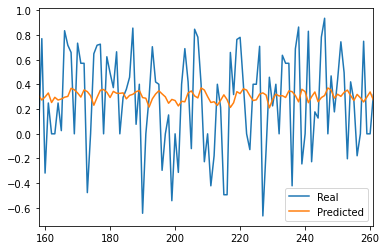

In [106]:
sentiment.plot()